In [2]:
# Import all libraries

import pandas as pd
import numpy as np
import glob
import os
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense

In [3]:
rstate = 2
path = '../data_engineering/outputs/rental/'

In [4]:
# load the data
parquet_files = glob.glob(os.path.join(path, "*.parquet"))
data = pd.concat((pd.read_parquet(f) for f in parquet_files))

inputs = data[['sqfeet',
              'beds',
              'baths',
              'income',
              'density']]

scaler = MinMaxScaler()
scaler.fit(inputs)
pickle.dump(scaler, open('./outputs/rent_models_scaled_poly/scaler.pkl', 'wb'))

inputs_scaled = scaler.transform(inputs)
              
outputs = data['price']

In [5]:
inputs_scaled

array([[0.1478    , 0.125     , 0.13333333, 0.13984129, 0.02642957],
       [0.05      , 0.        , 0.13333333, 0.08018521, 0.04739802],
       [0.18      , 0.25      , 0.13333333, 0.1154819 , 0.02866913],
       ...,
       [0.18      , 0.25      , 0.26666667, 0.18379245, 0.00271996],
       [0.3384    , 0.375     , 0.26666667, 0.18379245, 0.00271996],
       [0.234     , 0.25      , 0.26666667, 0.20208726, 0.02636599]])

In [6]:
data.describe()

,sqfeet,beds,baths,income,density,price
count,364619.000000,364619.000000,364619.000000,364619.000000,364619.000000,364619.000000
mean,985.920421,1.887406,1.474538,52919.322411,2661.581543,1166.330460
std,370.303770,0.870946,0.581496,18833.256842,3957.104248,521.520512
min,0.000000,0.000000,0.000000,2499.000000,0.000000,100.000000
25%,750.000000,1.000000,1.000000,40412.000000,674.000000,810.000000
50%,945.000000,2.000000,1.000000,49942.000000,1739.000000,1033.000000
75%,1144.000000,2.000000,2.000000,63337.000000,3381.000000,1391.000000
max,5000.000000,8.000000,7.500000,250001.000000,141546.000000,4000.000000


In [7]:
import itertools
import matplotlib.pyplot as plt


def graph_dist(inputs):
    labels = ['sqfeet',
              'beds',
              'baths',
              'income',
              'density']
    
    fig,axs = plt.subplots(1,5,figsize=(25,5))
    for i in range(5):
        axs[i].scatter(inputs[labels[i]],inputs['price'])
        axs[i].set_xlabel(labels[i])
        axs[i].set_ylabel("Price")
    plt.tight_layout()
    return fig, axs


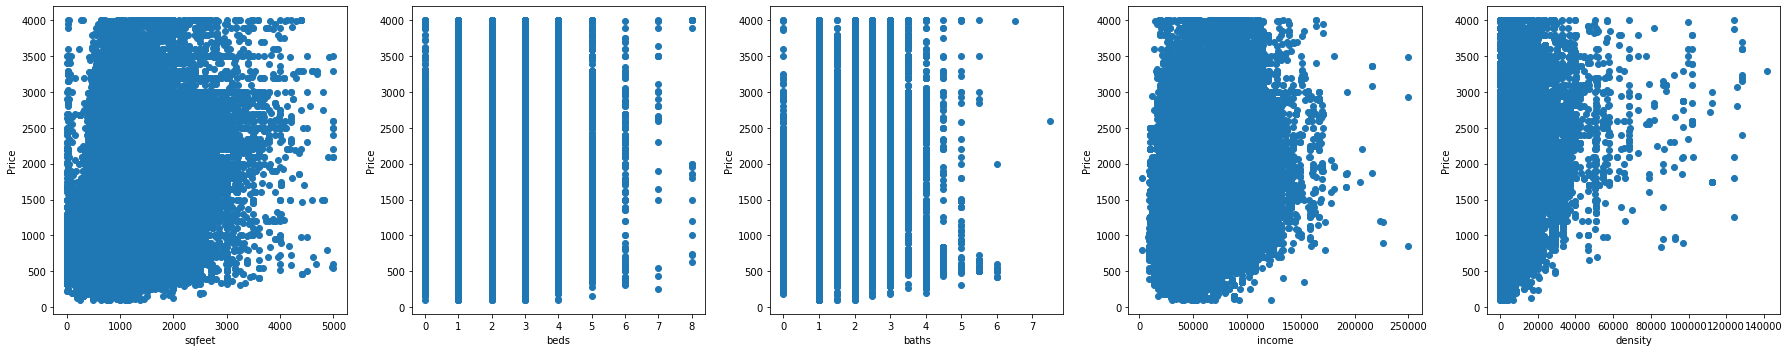

In [8]:
fig, axs = graph_dist(data)

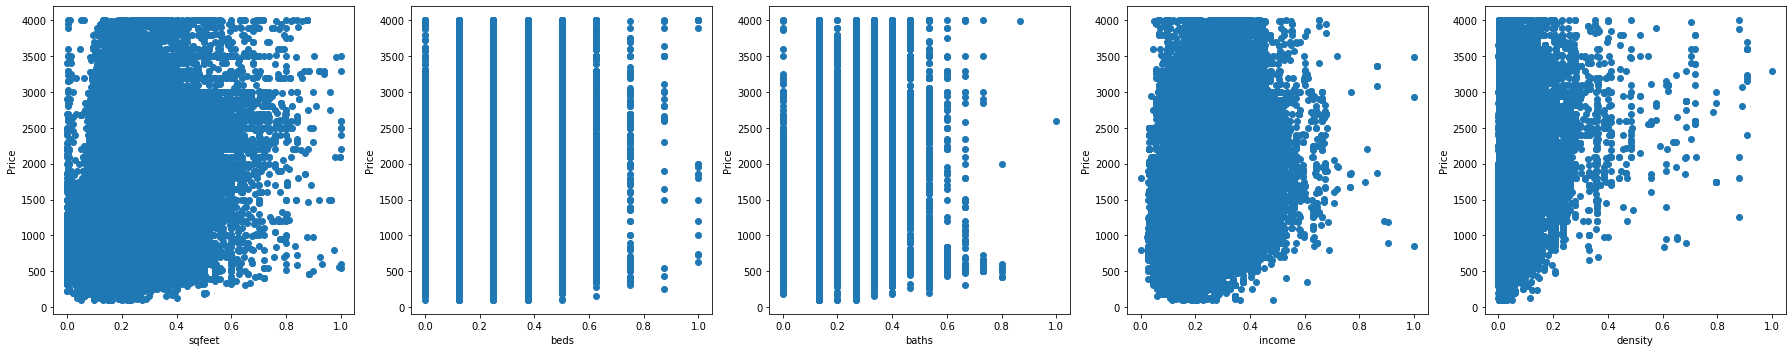

In [9]:

def graph_dist(inputs):
    labels = ['sqfeet',
              'beds',
              'baths',
              'income',
              'density']
    ipt = pd.DataFrame(inputs_scaled, columns=labels)
    fig,axs = plt.subplots(1,5,figsize=(25,5))
    for i in range(5):
        axs[i].scatter(ipt[labels[i]],inputs['price'])
        axs[i].set_xlabel(labels[i])
        axs[i].set_ylabel("Price")
    plt.tight_layout()
    return fig, axs
fig, axs = graph_dist(data)

In [10]:
poly = PolynomialFeatures(2)
inputs2 = poly.fit_transform(inputs_scaled)
pickle.dump(poly, open('./outputs/rent_models_scaled_poly/poly.pkl', 'wb'))

In [11]:
len(inputs2[0])

21

In [12]:
x_train, x_test, y_train, y_test = train_test_split(inputs2, outputs, test_size = 0.2, random_state=rstate)

In [13]:
x_train

array([[1.00000000e+00, 1.80000000e-01, 2.50000000e-01, ...,
        1.80239917e-02, 2.44612829e-03, 3.31976607e-04],
       [1.00000000e+00, 2.02000000e-01, 2.50000000e-01, ...,
        7.90130936e-02, 7.84420668e-04, 7.78751667e-06],
       [1.00000000e+00, 2.80000000e-01, 3.75000000e-01, ...,
        1.00168150e-02, 1.88789783e-04, 3.55817514e-06],
       ...,
       [1.00000000e+00, 1.72800000e-01, 2.50000000e-01, ...,
        1.33351349e-02, 3.60516468e-03, 9.74659233e-04],
       [1.00000000e+00, 2.28800000e-01, 2.50000000e-01, ...,
        9.48873570e-02, 5.24691205e-03, 2.90134396e-04],
       [1.00000000e+00, 1.92800000e-01, 2.50000000e-01, ...,
        4.04044077e-02, 1.83191991e-03, 8.30585258e-05]])

### Trying Models, evaluating, and saving them

Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

linmodel = LinearRegression()
linmodel.fit(x_train, y_train)

LinearRegression()

In [15]:
linmodel.score(x_test, y_test)

0.4035200181088623

In [16]:
linmodel.predict(x_test)

array([ 964.49296883,  981.89042383, 1091.22933865, ..., 1136.12500966,
       1396.6020751 , 1218.20625388])

In [17]:
ridgemodel = Ridge()
ridgemodel.fit(x_train, y_train)

Ridge()

In [18]:
ridgemodel.score(x_test, y_test)

0.4022177092295003

In [19]:
ridgemodel.predict(x_test)

array([ 967.01841027,  977.62610043, 1086.39595347, ..., 1139.88244012,
       1382.87957061, 1217.61480714])

In [20]:
lassomodel = Lasso()
lassomodel.fit(x_train, y_train)

Lasso()

In [21]:
lassomodel.score(x_test, y_test)

0.3600557546017892

In [22]:
lassomodel.predict(x_test)

array([ 973.252415  ,  950.59413411, 1105.63592615, ..., 1192.69619628,
       1297.93777543, 1201.04211099])

In [23]:
import eli5
eli5.show_weights(lassomodel)

Weight?,Feature
+5021.274,x5
+2355.657,x4
+2003.260,x1
+505.000,x3
+99.988,<BIAS>
-11.257,x2


In [24]:
pickle.dump(linmodel, open('./outputs/rent_models_scaled_poly/linmodel_2.pkl', 'wb'))
pickle.dump(ridgemodel, open('./outputs/rent_models_scaled_poly/ridgemodel_2.pkl', 'wb'))
pickle.dump(lassomodel, open('./outputs/rent_models_scaled_poly/lassomodel_2.pkl', 'wb'))

Tensorflow Neural Network

In [25]:
# Keras NN model to be created
def create_model(inputs, outputs):
    input_layer = Input(shape=(21, ))
    x1 = Dense(15, activation='relu', kernel_initializer='normal') (input_layer)
    x2 = Dense(5, activation='relu', kernel_initializer='normal') (x1)
    x3 = Dense(3, activation='relu', kernel_initializer='normal') (x2)
    output = Dense(1, activation='linear', kernel_initializer='normal') (x3)

    t_model = Model(inputs=input_layer, outputs=output)

    t_model.compile(
        loss='mean_squared_error', 
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["mean_squared_error"]
    )
    
    t_model.fit(inputs, outputs, epochs=350, batch_size=1000, verbose=True)
    return t_model

In [26]:
nn_model = create_model(x_train, y_train)

Epoch 1/350


2022-12-08 14:28:41.171329: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


292/292 [==============================] - 1s 1ms/step - loss: 1630163.2500 - mean_squared_error: 1630163.2500
Epoch 2/350
292/292 [==============================] - 0s 1ms/step - loss: 1629482.0000 - mean_squared_error: 1629482.0000
Epoch 3/350
292/292 [==============================] - 1s 2ms/step - loss: 1628802.2500 - mean_squared_error: 1628802.2500
Epoch 4/350
292/292 [==============================] - 1s 2ms/step - loss: 1628123.1250 - mean_squared_error: 1628123.1250
Epoch 5/350
292/292 [==============================] - 1s 2ms/step - loss: 1627442.8750 - mean_squared_error: 1627442.8750
Epoch 6/350
292/292 [==============================] - 1s 2ms/step - loss: 1626763.8750 - mean_squared_error: 1626763.8750
Epoch 7/350
292/292 [==============================] - 1s 2ms/step - loss: 1626083.7500 - mean_squared_error: 1626083.7500
Epoch 8/350
292/292 [==============================] - 1s 2ms/step - loss: 1625405.0000 - mean_squared_error: 1625405.0000
Epoch 9/350
292/292 [=======

In [27]:
y_pred = nn_model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-4.16051155474714

In [28]:
nn_model.evaluate(x_test, y_test)

2279/2279 [==============================] - 2s 924us/step - loss: 1411298.5000 - mean_squared_error: 1411298.5000


[1411298.5, 1411298.5]

In [29]:
nn_model.save('./outputs/rent_models_scaled_poly/nn_model_2.h5')